In [163]:
import numpy as np
from matplotlib import pylab as pl
from os import listdir
import imageio

%matplotlib inline

In [49]:
ifo_dir = '../../../20181004_ITMX_HWS_Raw/ifo_data/'
ifo_List = listdir(ifo_dir)

keys = []
data_ifo = []

data = np.loadtxt(ifo_data+ifo_List[0])

time_data = data[:,0]

#First append time to the lists
keys.append('Time')
data_ifo.append(time_data)

for i in range(len(ifo_List)):
    f = ifo_List[i].replace('20181004_','')
    a = f.replace('.dat','')
    keys.append(a)
    
    d_ifo = np.loadtxt(ifo_data+ifo_List[i])
    data_ifo.append(d_ifo[:,1])

dict_ifo = dict(zip(keys, data_ifo))

In [65]:
data_ifo[0]

1222648650.0625

In [50]:
print(dict_ifo.keys())

dict_keys(['Time', 'BS_OPLEV_P', 'BS_OPLEV_Y', 'IMC_PWR_IN', 'ITMXCO2', 'ITMX_OPLEV_P', 'ITMX_OPLEV_Y', 'PRC_GAIN', 'SR3_OPLEV_P', 'SR3_OPLEV_Y'])


In [106]:
# need to correlate time between ifo data and HWS data
a = []
if len(itemindex[0]) == 0:
    print("emtpy")
else:
    print('Not empty')
    

emtpy


In [133]:
img_gps = []

for i in range(len(FileList)):
    img_gps.append(int(FileList[i].replace('_H1_ITMX_HWS_raw_image.raw','')))

In [107]:
#times where we have hws data and ifo data
ifo_hws_times = []
for i in range(len(img_gps)):
    itemindex = np.where(dict_ifo['Time'][:]==img_gps[i])
    if len(itemindex[0]) != 0:
        ifo_hws_times.append(img_gps[i])
    else:
        continue

print(ifo_hws_times)

[1222648659.0, 1222648670.0, 1222648681.0, 1222648692.0, 1222648703.0, 1222648714.0, 1222648725.0, 1222648736.0, 1222648747.0, 1222648758.0, 1222648769.0, 1222648780.0, 1222648791.0, 1222648802.0, 1222648813.0, 1222648824.0, 1222648835.0, 1222648846.0, 1222648857.0, 1222648868.0, 1222648879.0, 1222648890.0, 1222648901.0, 1222648912.0, 1222648923.0, 1222648934.0, 1222648945.0, 1222648956.0, 1222648967.0, 1222648978.0, 1222648989.0]


In [118]:
#cut the ifo data dictionary down to the relevant data
s_indx = np.where(dict_ifo['Time'][:]==ifo_hws_times[0])
e_indx = np.where(dict_ifo['Time'][:]==ifo_hws_times[-1])

for key,value in dict_ifo.items():
    value = value[int(s_indx[0]):int(e_indx[0])]

[144] [5424]


In [52]:
data_direc = '../../../20181004_ITMX_HWS_Raw/data/'
FileList = listdir(data_direc)

img_List = []
for i in range(len(FileList)):
    filename = data_direc+FileList[i]
    array = np.fromfile(filename, dtype='int16', sep="")
    array_reshape = array.reshape([1024,1024])
    #f = np.flip(array_reshape,0)
    img_List.append(array_reshape)

In [53]:
x = y = range(0,1024,1)

X,Y = np.meshgrid(x,y)

In [ ]:
# Test one single guy
from matplotlib.gridspec import GridSpec

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


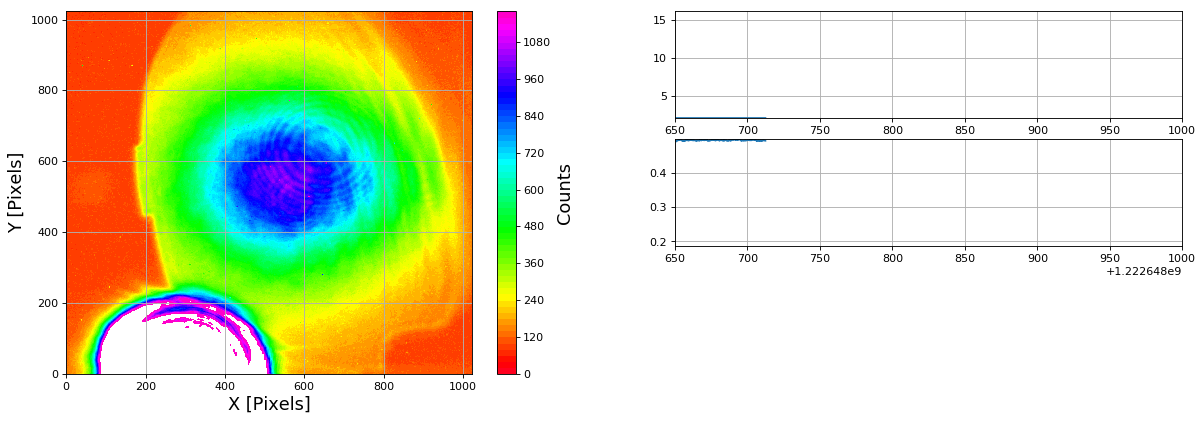

In [165]:
gs=GridSpec(3,2) # 3 rows, 2 columns

fig = pl.figure(figsize=(18, 6), dpi=80)

ax1=fig.add_subplot(gs[:,0]) # Second row, span all columns
c_range = range(0,1200,20)
pl.contourf(X,Y,img_List[20],c_range, cmap='gist_rainbow')
pl.xlabel("X [Pixels]",fontsize=16)
pl.ylabel("Y [Pixels]",fontsize=16)
pl.grid()

cbar = pl.colorbar()
cbar.set_label('Counts',fontsize = 16)
pl.legend(loc='upper left',fontsize=14)

ax2=fig.add_subplot(gs[0,1]) # First row, second column
pl.plot(dict_ifo['Time'][:1000],dict_ifo['IMC_PWR_IN'][0:1000])
pl.grid()
pl.xlim(dict_ifo['Time'][0],dict_ifo['Time'][-1])
pl.ylim(min(dict_ifo['IMC_PWR_IN']),max(dict_ifo['IMC_PWR_IN']))

ax3=fig.add_subplot(gs[1,1])

pl.plot(dict_ifo['Time'][0:1000],dict_ifo['ITMXCO2'][0:1000])
pl.grid()
pl.xlim(dict_ifo['Time'][0],dict_ifo['Time'][-1])
pl.ylim(min(dict_ifo['ITMXCO2']),max(dict_ifo['ITMXCO2']))

pl.show()

In [143]:
hws_index1 = np.where(img_gps==1222648736)

hws_index1 = img_gps.index(1222648736)
print(img_gps)
print(hws_index1)

[1222648604, 1222648615, 1222648626, 1222648637, 1222648648, 1222648659, 1222648670, 1222648681, 1222648692, 1222648703, 1222648714, 1222648725, 1222648736, 1222648747, 1222648758, 1222648769, 1222648780, 1222648791, 1222648802, 1222648813, 1222648824, 1222648835, 1222648846, 1222648857, 1222648868, 1222648879, 1222648890, 1222648901, 1222648912, 1222648923, 1222648934, 1222648945, 1222648956, 1222648967, 1222648978, 1222648989, 1222649000]
12


In [166]:
#### Make all the pngs
png_direc = '../../../20181004_ITMX_HWS_Raw/png/'
png_files = []
for i in range(len(ifo_hws_times)):
    ifo_index = np.where(dict_ifo['Time'][:]==ifo_hws_times[i])
    ifo_index = int(ifo_index[0])
    
    hws_index = img_gps.index(int(ifo_hws_times[i]))
    
    gs=GridSpec(3,2) # 3 rows, 2 columns

    fig = pl.figure(figsize=(18, 6), dpi=80)

    ax1=fig.add_subplot(gs[:,0]) # Second row, span all columns
    c_range = range(0,1200,20)
    pl.contourf(X,Y,img_List[hws_index],c_range, cmap='gist_rainbow')
    pl.xlabel("X [Pixels]",fontsize=16)
    pl.ylabel("Y [Pixels]",fontsize=16)
    pl.grid()

    cbar = pl.colorbar()
    cbar.set_label('Counts',fontsize = 16)
    pl.legend(loc='upper left',fontsize=14)

    ax2=fig.add_subplot(gs[0,1]) # First row, second column
    pl.plot(dict_ifo['Time'][0:ifo_index],dict_ifo['IMC_PWR_IN'][0:ifo_index])
    pl.grid()
    pl.xlim(dict_ifo['Time'][0],dict_ifo['Time'][-1])
    pl.ylim(min(dict_ifo['IMC_PWR_IN'])-2.0,max(dict_ifo['IMC_PWR_IN'])+1.0)
    pl.ylabel('IMC Power')

    ax3=fig.add_subplot(gs[1,1])

    pl.plot(dict_ifo['Time'][0:ifo_index],dict_ifo['ITMXCO2'][0:ifo_index])
    pl.grid()
    pl.xlim(dict_ifo['Time'][0],dict_ifo['Time'][-1])
    pl.ylim(min(dict_ifo['ITMXCO2'])-.1,max(dict_ifo['ITMXCO2'])+.1)
    pl.ylabel('CO2 Power')
    
    save_file = png_direc+FileList[i]+".png"
    png_files.append(save_file)
    pl.savefig(save_file)
    
    pl.close(fig)

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [167]:
images = []
for i in range(len(png_files)):
        images.append(imageio.imread(png_files[i]))
imageio.mimsave('./20181004_HWSX_PlateOff_PowerUp.gif', images,duration=1)